In [28]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import numpy as np
import pycm
import cv2
from PIL import Image

In [5]:
def parse_tensorboard(path, scalars):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _absorb_print = ea.Reload()
    # make sure the scalars are in the event accumulator tags
    assert all(
        s in ea.Tags()["scalars"] for s in scalars
    ), "some scalars were not found in the event accumulator"
    return {k: pd.DataFrame(ea.Scalars(k)) for k in scalars}


In [8]:
path = '../tb_logs/ConvNext/'
scalar='scalars'
parse_tensorboard(path, scalars)

NameError: name 'scalars' is not defined

In [7]:
# New Plot for confusion matrix

cf = np.load('../output_files/cf_matrix/ResNet_original_finetune_Fold4.npy')
pycm_cf = pycm.ConfusionMatrix(matrix=cf)



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

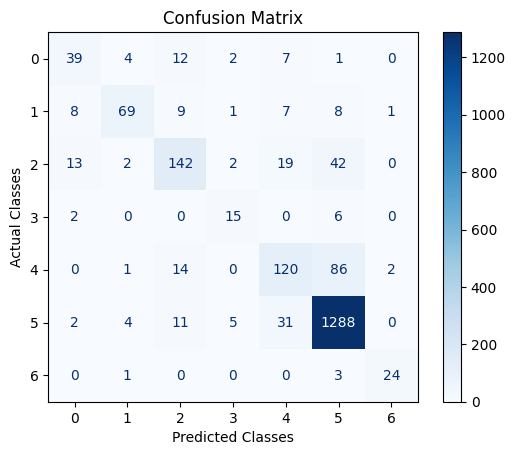

In [12]:
pycm_cf.class_stat
pycm_cf.plot(cmap=plt.cm.Blues,number_label=True,one_vs_all=True,class_name="L1")

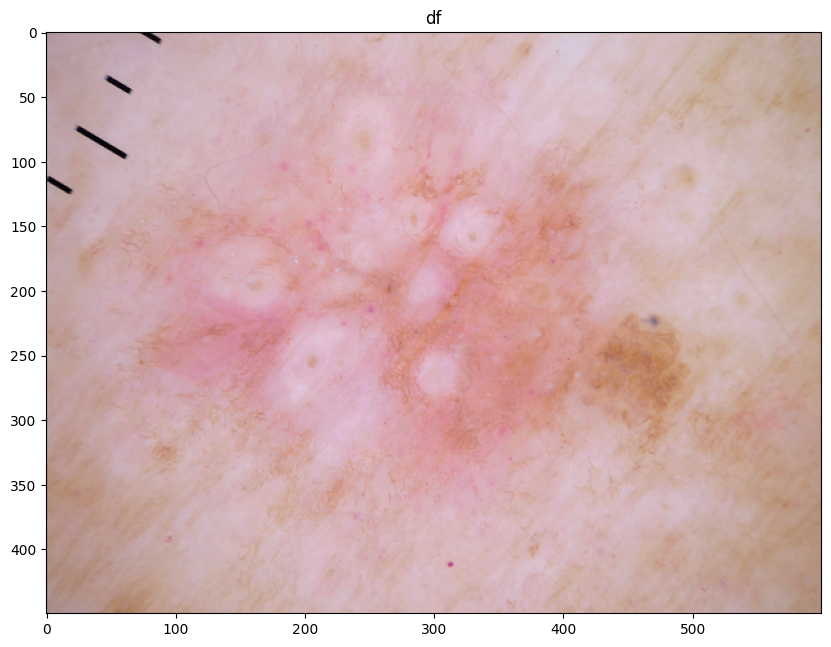

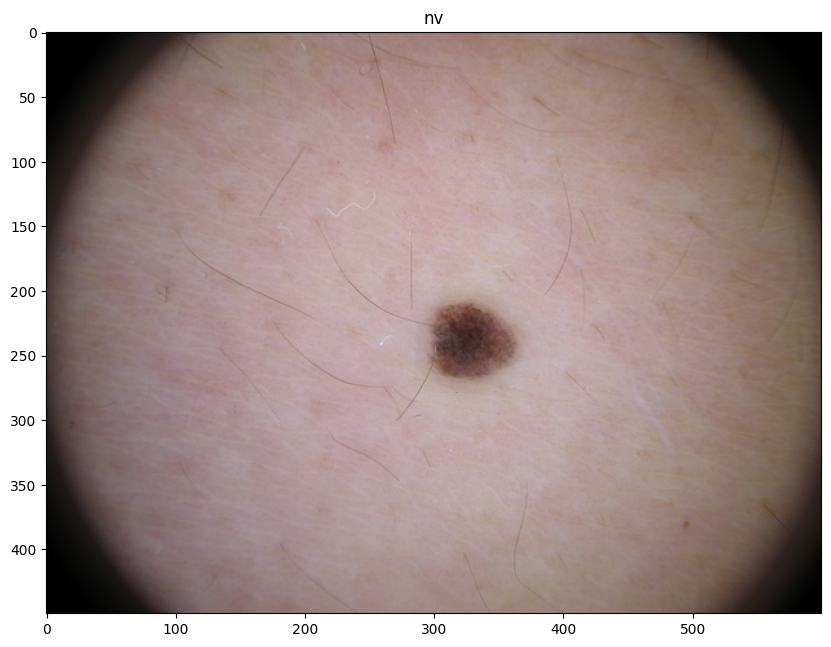

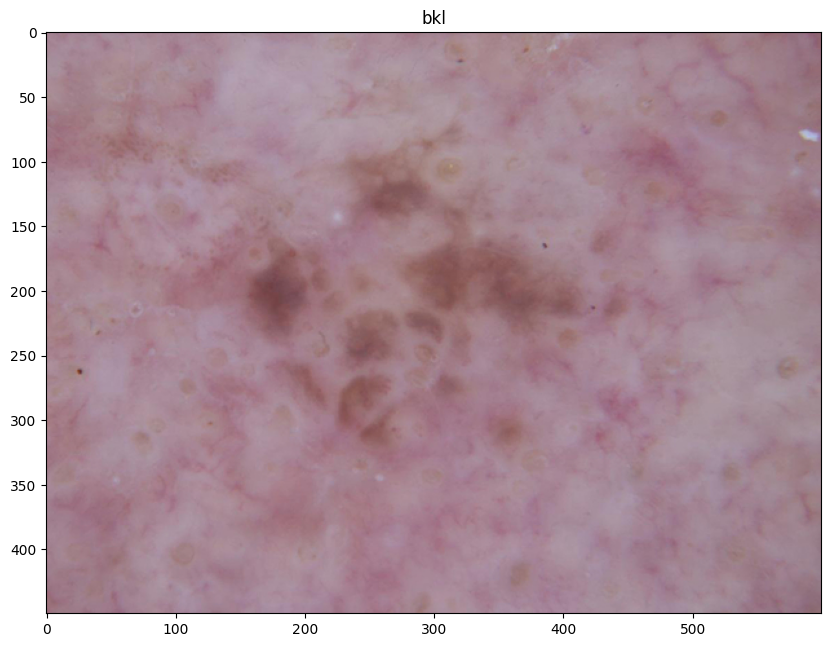

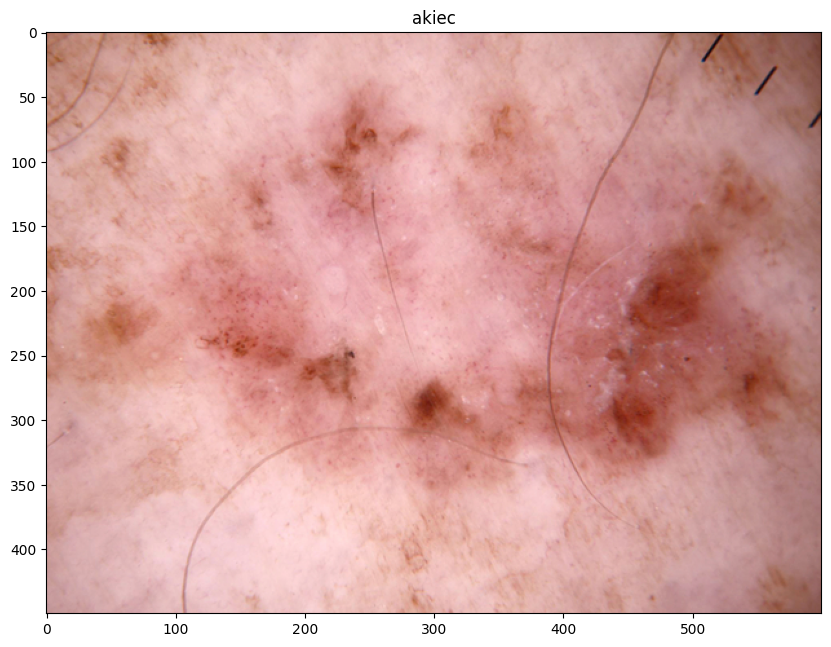

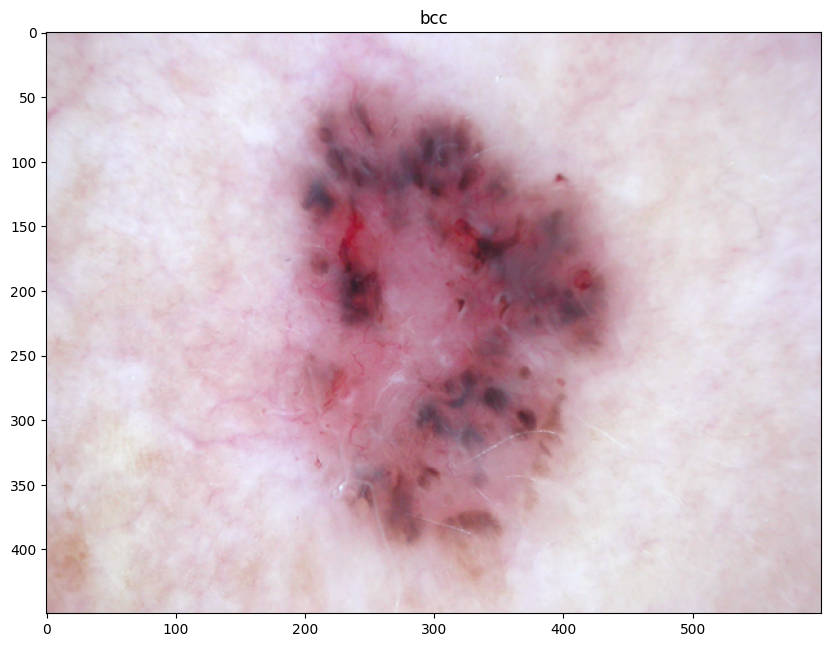

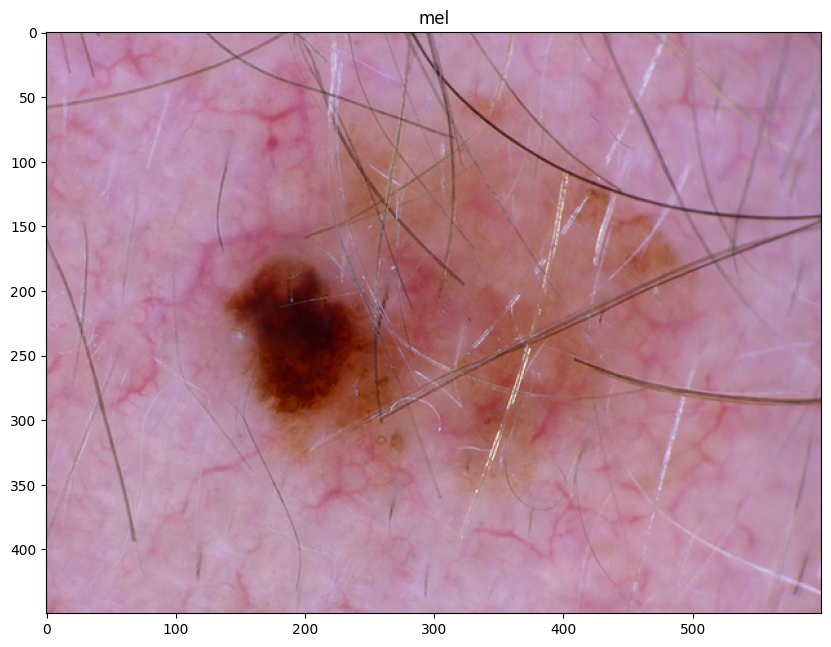

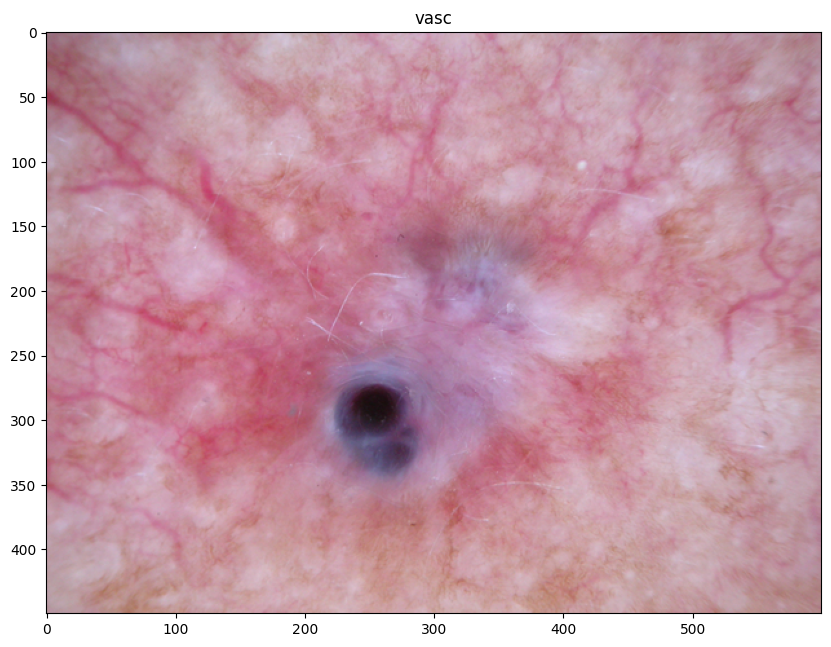

In [33]:
# Get an image for the class specified

def getImagePathForClass(fileMeta, cls):
    meta = pd.read_csv(fileMeta)
    selectedClass = meta[meta['dx'] == cls]
    
    path = selectedClass.iloc[0,:]['image_pth']
    plt.figure(figsize=(10, 10))
    plt.imshow(Image.open(path))
    plt.title(cls)
    plt.savefig(f'../output_files/{cls}.png')


df = getImagePathForClass('../csv/train.csv', 'df')
nv = getImagePathForClass('../csv/train.csv', 'nv')
bkl = getImagePathForClass('../csv/train.csv', 'bkl')
akiec = getImagePathForClass('../csv/train.csv', 'akiec')
bcc = getImagePathForClass('../csv/train.csv', 'bcc')
mel = getImagePathForClass('../csv/train.csv', 'mel')
vasc = getImagePathForClass('../csv/train.csv', 'vasc')

